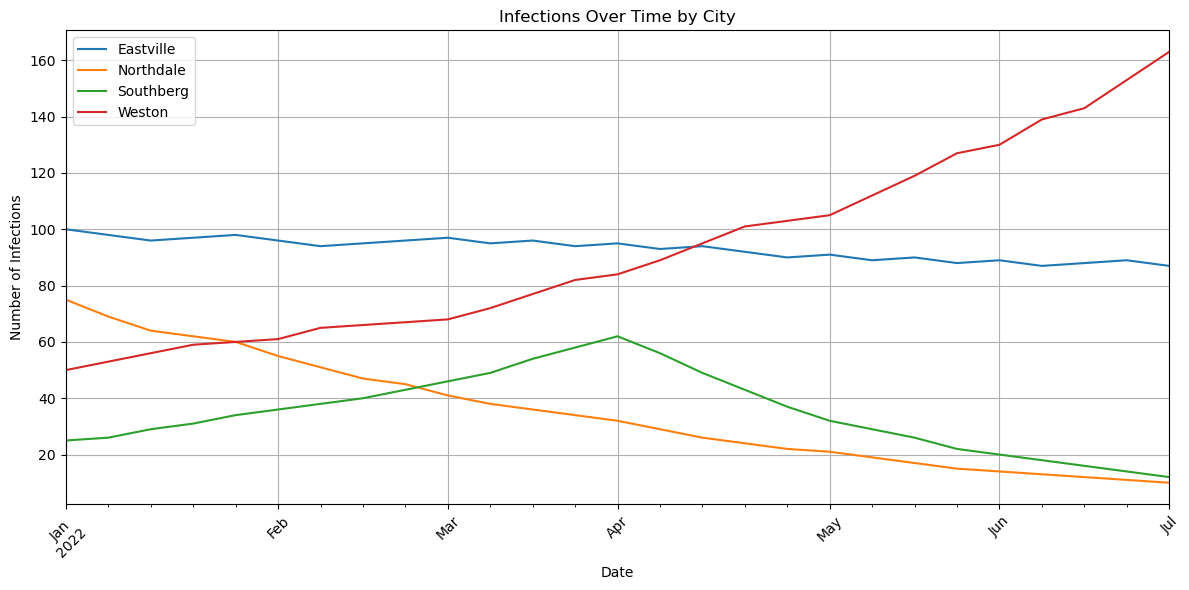

In [5]:
import pandas as pd
import matplotlib.pyplot as plt


health_data = pd.read_csv('HealthData.csv')
population_data = pd.read_csv('PopulationData.csv')
merged_data = health_data.merge(population_data, on='Towncode')
merged_data['Date'] = pd.to_datetime(merged_data['Date'])

plt.figure(figsize=(12, 6))
for town, data in merged_data.groupby('Townname'):
    data.groupby('Date')['Cases'].sum().plot(label=town)

plt.title('Infections Over Time by City')
plt.xlabel('Date')
plt.ylabel('Number of Infections')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



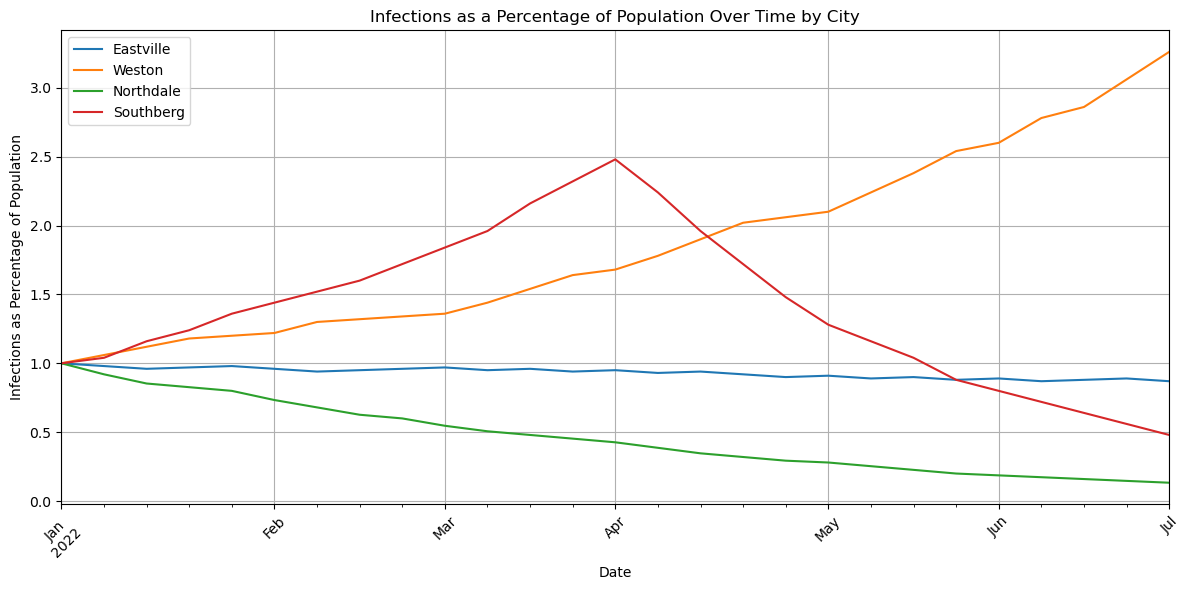

In [10]:
merged_data['Cases_Percentage'] = merged_data['Cases'] * 100 / merged_data['Population']

plt.figure(figsize=(12, 6))

for town in merged_data['Townname'].unique():
    merged_data[merged_data['Townname'] == town].groupby('Date')['Cases_Percentage'].sum().plot(label=town)

plt.title('Infections as a Percentage of Population Over Time by City')
plt.xlabel('Date')
plt.ylabel('Infections as Percentage of Population')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


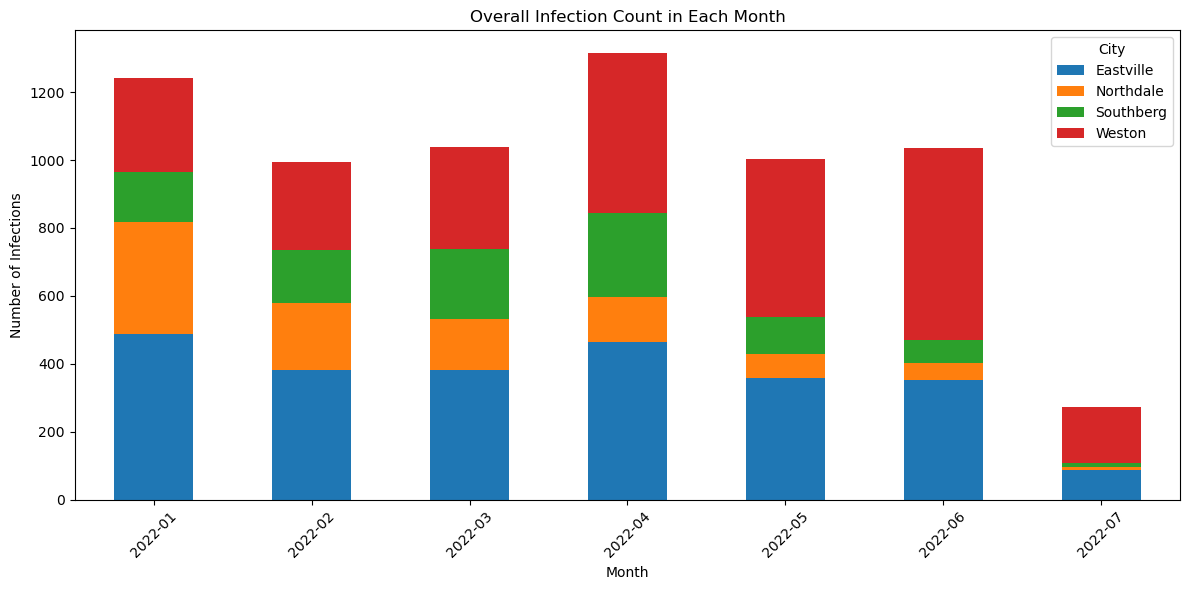

In [11]:
merged_data['YearMonth'] = pd.to_datetime(merged_data['Date']).dt.to_period('M')

merged_data.groupby(['YearMonth', 'Townname'])['Cases'].sum().unstack().plot(
    kind='bar', stacked=True, figsize=(12, 6))

plt.title('Overall Infection Count in Each Month')
plt.xlabel('Month')
plt.ylabel('Number of Infections')
plt.legend(title='City')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
